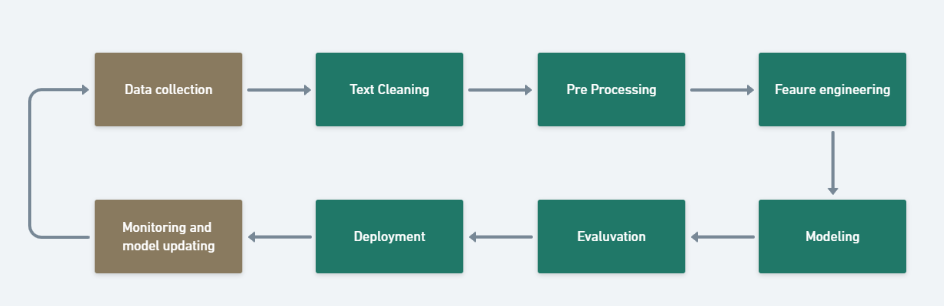

In [ ]:
1. Data Collection 
2. Text-Pre-Processing
    1. Split data using Tokention (Word, Stentance)
    2. check spelling, Removing symbol, imge, emojis' 
3. Feature Eng. 
    1. One hote encoder 
    2. BoW 
    3. ngram
    4. TF-IDF 
    5. Word2Vec 
4. Build NLP model 
    1. Machine Learning  models 
    2. Deep Leearning Model
    3. Cloud APIs  
5. Evaluating Model 
    1. Precision 
    2. Re-call 
    3. F1 Score 
    4. Accuracy 
    5. Confusion Matrix 

In [ ]:
https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [ ]:
conda install nltk

or 

pip install nltk 

In [2]:
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
import nltk 

In [3]:
messages = [line.rstrip() for line in open('C:/Users/RAMAR BOSE/Downloads/sms+spam+collection/SMSSpamCollection')]

print(len(messages))

5574


In [4]:
for message_no, message in enumerate(messages[:10]): 
    print(message_no, message) 
    print('\n')


0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [5]:
import pandas 

In [7]:
messages = pandas.read_csv('C:/Users/RAMAR BOSE/Downloads/sms+spam+collection/SMSSpamCollection', sep='\t', names=['label', 'message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# EDA - NLP 
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [11]:
messages['length'] = messages['message'].apply(len) 

messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<Axes: ylabel='Frequency'>

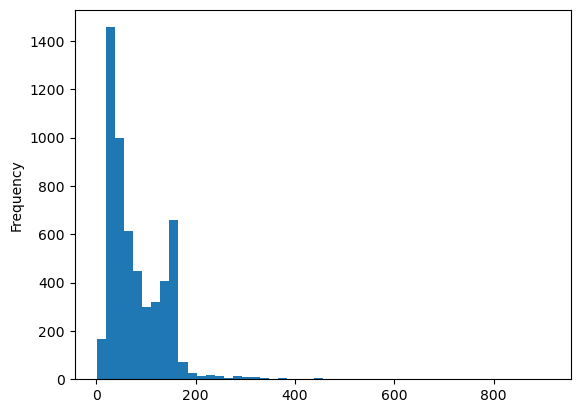

In [14]:
messages['length'].plot(bins=50, kind='hist')

In [21]:
# Text Feature Engineering 


In [15]:
import string 

msg = 'Hey this is Ramar Bose!, Im learning AI on cloud platform' 

#tk 
from nltk.tokenize import word_tokenize 
word_tokenize(msg)

['Hey',
 'this',
 'is',
 'Ramar',
 'Bose',
 '!',
 ',',
 'Im',
 'learning',
 'AI',
 'on',
 'cloud',
 'platform']

In [30]:
from nltk.corpus import stopwords 

In [33]:
stopwords.words('english') [:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
nopunc = [char for char in msg if char not in string.punctuation] 

nopunc= ''.join(nopunc)

In [17]:
msg

'Hey this is Ramar Bose!, Im learning AI on cloud platform'

In [18]:
nopunc

'Hey this is Ramar Bose Im learning AI on cloud platform'

In [19]:
nopunc.split()

['Hey',
 'this',
 'is',
 'Ramar',
 'Bose',
 'Im',
 'learning',
 'AI',
 'on',
 'cloud',
 'platform']

In [20]:
nopunc

'Hey this is Ramar Bose Im learning AI on cloud platform'

In [22]:
from nltk.corpus import stopwords

In [23]:
 cl_msg=  [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [24]:
cl_msg

['Hey', 'Ramar', 'Bose', 'Im', 'learning', 'AI', 'cloud', 'platform']

In [25]:
def text_process(mess): 
    nopunc = [char for char in mess if char not in string.punctuation] 
    nopunc = ''.join(nopunc) 
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    

In [26]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
messages['message'].head().apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [ ]:
# Normalization : 
    1. Steaming 
    2. Limination 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer =  CountVectorizer(analyzer=text_process).fit(messages['message'])

In [31]:
print(len(bow_transformer.vocabulary_))

11425


In [32]:
msg4 = messages['message'][3]

In [33]:
msg4

'U dun say so early hor... U c already then say...'

In [34]:
bow4 = bow_transformer.transform([msg4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [38]:
print(bow_transformer.get_feature_names_out() [4068])
print(bow_transformer.get_feature_names_out() [4629])
print(bow_transformer.get_feature_names_out() [9554])

U
already
say


In [42]:
messages_bow = bow_transformer.transform(messages['message']) 

print('Shape of Sparse Matrix:' , messages_bow.shape) 
print('Amount of Non-zero occurance:', messages_bow.nnz) 
print('Sparsilty value: %.2f%%',(100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix: (5572, 11425)
Amount of Non-zero occurance: 50548
Sparsilty value: %.2f%% 0.07940295412668218


In [43]:
# TF -iDF 

from sklearn.feature_extraction.text import TfidfTransformer 


tfidf_transformer = TfidfTransformer().fit(messages_bow) 
tfidf4 = tfidf_transformer.transform(bow4)

print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [44]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])
      

3.2800524267409408
8.527076498901426


In [46]:
messages_tfidf = tfidf_transformer.transform(messages_bow) 

print(messages_tfidf.shape)

(5572, 11425)


In [49]:
# Machine Learning - Model 
from sklearn.naive_bayes import MultinomialNB 

spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [53]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])

predicted: ham


In [54]:
print('expected:', messages.label[3])

expected: ham


In [55]:
all_predictions =  spam_detect_model.predict(messages_tfidf) 

print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [56]:
all_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [57]:
from sklearn.metrics import classification_report

print(classification_report(messages['label'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [62]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)



In [63]:
# create pipline 
from sklearn.pipeline import Pipeline

In [64]:
pipeline = Pipeline(
[
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('mlModel', MultinomialNB())
]
) 

In [65]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000018ED83E40E0>)),
                ('tfidf', TfidfTransformer()), ('mlModel', MultinomialNB())])

In [66]:
pred_nlp = pipeline.predict(msg_test)

In [67]:
pred_nlp

array(['ham', 'ham', 'ham', ..., 'ham', 'spam', 'ham'], dtype='<U4')

In [68]:
print(classification_report(pred_nlp, label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1021
        spam       0.72      1.00      0.84        94

    accuracy                           0.97      1115
   macro avg       0.86      0.98      0.91      1115
weighted avg       0.98      0.97      0.97      1115

